<a href="https://www.kaggle.com/code/samithsachidanandan/heart-disease-prediction?scriptVersionId=269486138" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Importing the Libraries 

In [1]:
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import log_loss, roc_auc_score, precision_score, f1_score, recall_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score, matthews_corrcoef
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn import metrics

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from lightgbm import LGBMClassifier

from sklearn.feature_selection import SelectKBest,RFE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel


### Loading the Dataset 

In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [3]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

### Data Cleaning & Preprocessing 

In [8]:
df.columns 

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
# Renaming the Columns for better Understanding
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar',
       'resting_ecg', 'max_heart_rate_achieved', 'exercise_angina', 'old_peak', 'st_slope',
       'target']

In [10]:
df['chest_pain_type'].value_counts()

chest_pain_type
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [11]:
df['resting_ecg'].value_counts()

resting_ecg
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [12]:
df['st_slope'].value_counts()

st_slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [13]:
df['sex'].value_counts()

sex
M    725
F    193
Name: count, dtype: int64

In [14]:
# Converting features to Categorical features with better labels
df['chest_pain_type'] = df['chest_pain_type'].map({'TA': 'Typical Angina', 'ATA': 'Atypical Angina', 'NAP': 'Non-anginal Pain', 'ASY': 'Asymptomatic'})
df['resting_ecg'] = df['resting_ecg'].map({'Normal': 'Normal', 'ST': 'ST-T Wave Abnormality', 'LVH': 'Left Ventricular Hypertrophy'})
df['exercise_angina'] = df['exercise_angina'].map({'Y': 'Yes', 'N': 'No'})  
df['st_slope'] = df['st_slope'].map({'Up': 'Upsloping', 'Flat': 'Flat', 'Down': 'Downsloping'})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({1: 'True', 0: 'False'})
df['sex'] = df['sex'].map({'M': 'Male', 'F': 'Female'})

In [15]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate_achieved,exercise_angina,old_peak,st_slope,target
0,40,Male,Atypical Angina,140,289,False,Normal,172,No,0.0,Upsloping,0
1,49,Female,Non-anginal Pain,160,180,False,Normal,156,No,1.0,Flat,1
2,37,Male,Atypical Angina,130,283,False,ST-T Wave Abnormality,98,No,0.0,Upsloping,0
3,48,Female,Asymptomatic,138,214,False,Normal,108,Yes,1.5,Flat,1
4,54,Male,Non-anginal Pain,150,195,False,Normal,122,No,0.0,Upsloping,0


In [16]:
df.shape

(918, 12)

### Exploratory Data Analysis (EDA)

#### Distribution of Heart Disease 

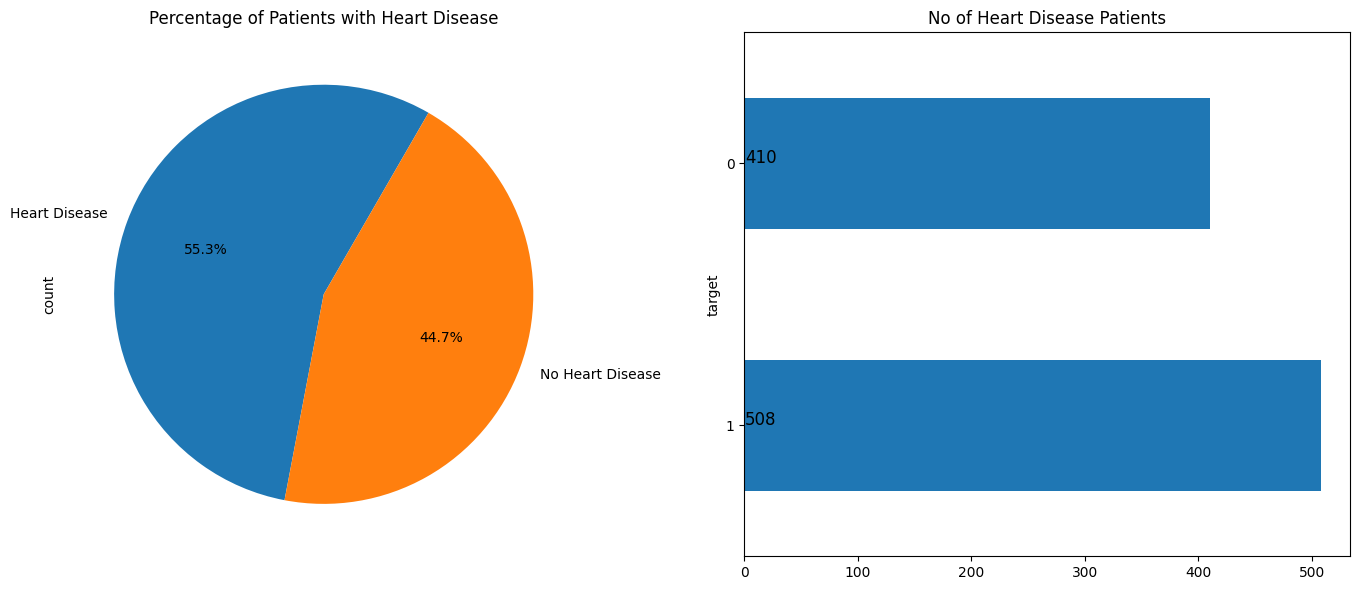

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey= False, figsize=(14,6))

ax1 = df['target'].value_counts().plot.pie( x= "Heart Disease", y = 'no of patients', autopct= '%1.1f%%', labels=['Heart Disease', 'No Heart Disease'], startangle=60, ax=ax1)
ax1.set_title('Percentage of Patients with Heart Disease')

ax2 = df['target'].value_counts().plot(kind='barh', ax= ax2)
for i, j in enumerate(df['target'].value_counts().values):
    ax2.text(.5, i , j, fontsize=12)
ax2.set(title='No of Heart Disease Patients')
plt.tight_layout()
plt.show()



#### Gender and Age wise Distribution 

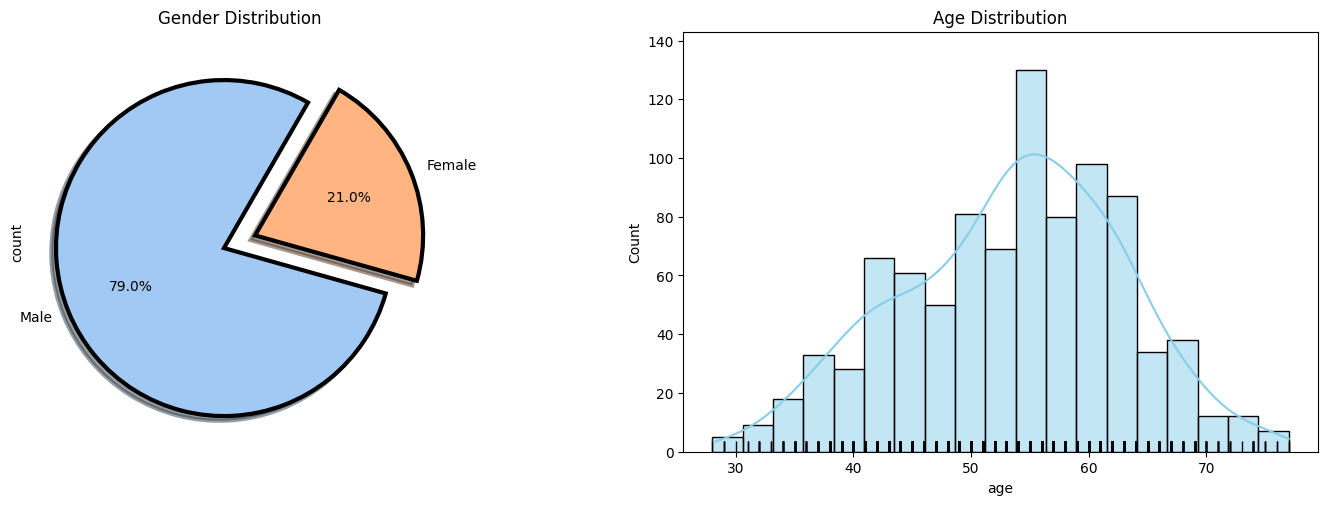

In [18]:
plt.figure(figsize=(18, 12))


plt.subplot(2, 2, 1)
df['sex'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=60,
    wedgeprops={'linewidth': 3, 'edgecolor': 'black'},
    explode=[0.1, 0.1],
    shadow=True
)
plt.title('Gender Distribution')


plt.subplot(2, 2, 2)
sns.histplot(df['age'], kde=True, color='skyblue')  
sns.rugplot(df['age'], color='black')               
plt.title('Age Distribution')

plt.show()

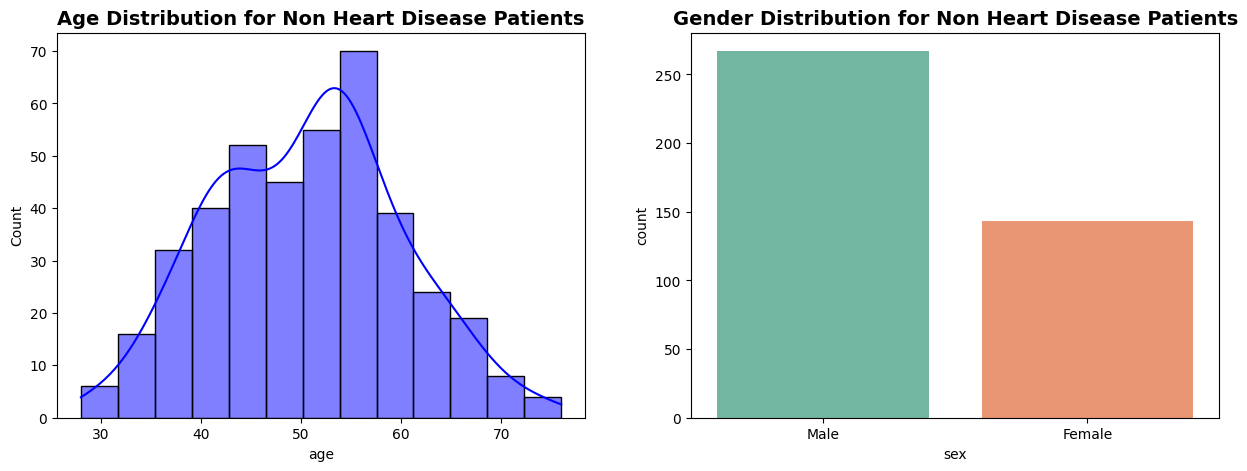

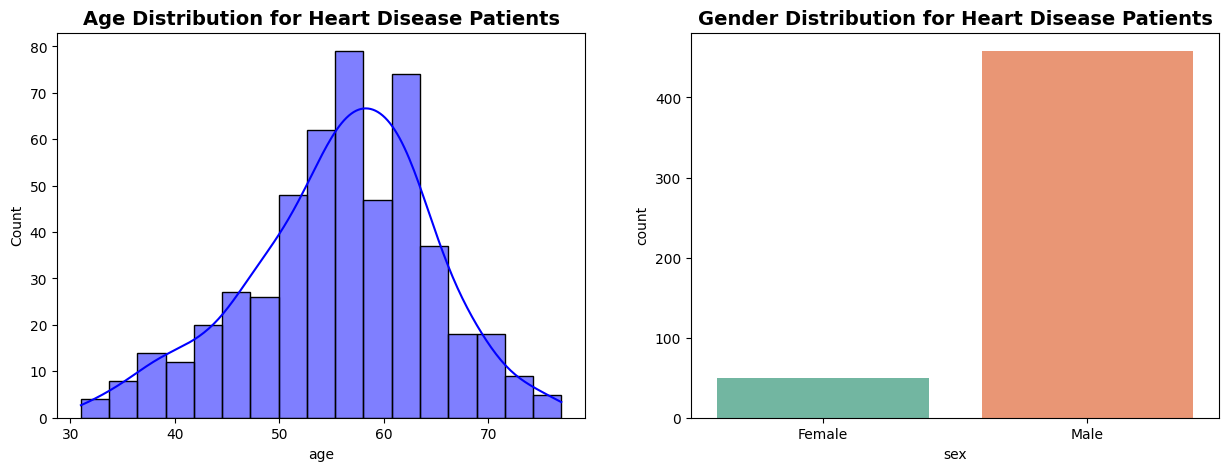

In [19]:
attr_1 = df[df['target'] == 1]
attr_0 = df[df['target'] == 0]  

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.histplot(attr_0['age'], kde=True, color='b', label='Heart Disease', ax=ax1)
plt.title('Age Distribution for Non Heart Disease Patients', fontsize=14, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x='sex', data=attr_0, palette='Set2', ax=ax1)
plt.title('Gender Distribution for Non Heart Disease Patients', fontsize=14, weight='bold')
plt.show()


fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.histplot(attr_1['age'], kde=True,  color='b', label='Heart Disease', ax=ax1)
plt.title('Age Distribution for Heart Disease Patients', fontsize=14, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x='sex', data=attr_1, palette='Set2', ax=ax1)
plt.title('Gender Distribution for Heart Disease Patients', fontsize=14, weight='bold')
plt.show()




#### Chest Pain Distribution 

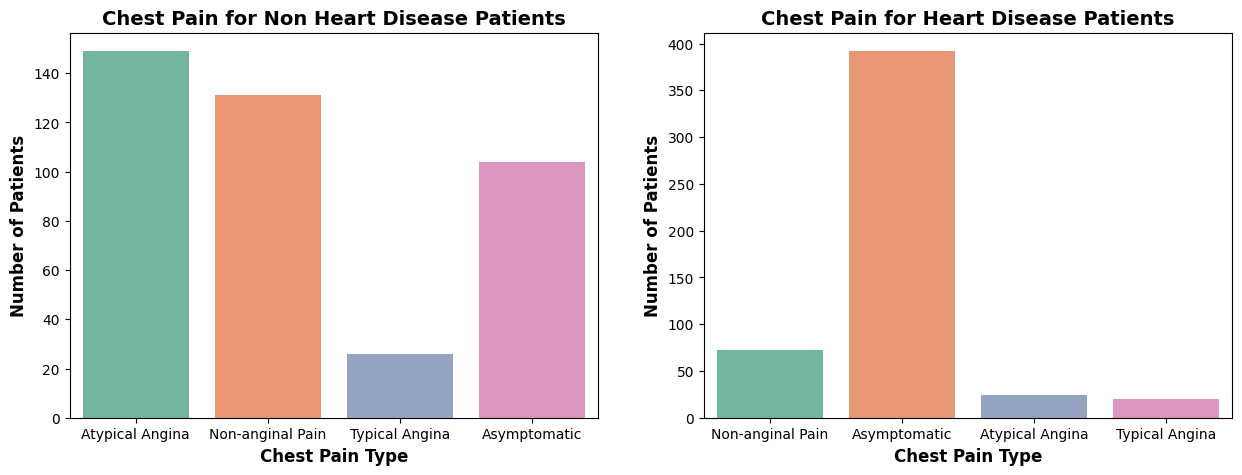

In [20]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x='chest_pain_type', data=attr_0, palette='Set2', ax=ax1)
plt.xlabel('Chest Pain Type', fontsize=12, weight='bold')
plt.ylabel('Number of Patients', fontsize=12, weight='bold')
plt.title('Chest Pain for Non Heart Disease Patients', fontsize=14, weight='bold')


ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x='chest_pain_type', data=attr_1, palette='Set2', ax=ax1)
plt.xlabel('Chest Pain Type', fontsize=12, weight='bold')
plt.ylabel('Number of Patients', fontsize=12, weight='bold')
plt.title('Chest Pain for Heart Disease Patients', fontsize=14, weight='bold')
plt.show()


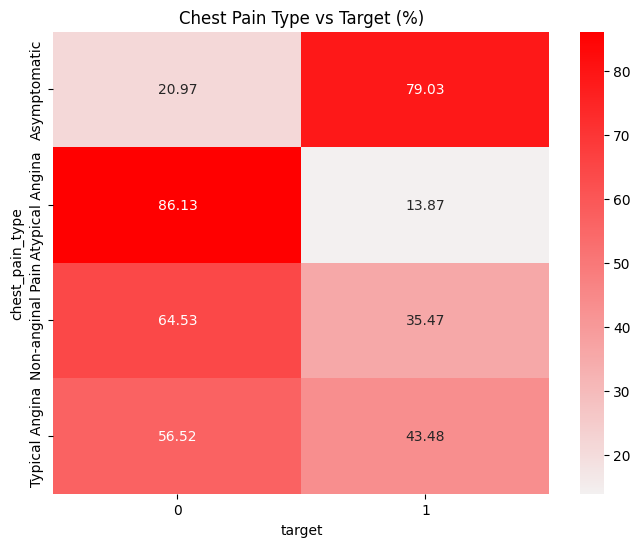

In [21]:
plot_criteria = ['chest_pain_type', 'target']


ct = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='index') * 100


plt.figure(figsize=(8,6))
sns.heatmap(ct, annot=True, fmt=".2f", cmap=sns.light_palette("red", as_cmap=True))
plt.title('Chest Pain Type vs Target (%)')
plt.ylabel(plot_criteria[0])
plt.xlabel(plot_criteria[1])
plt.show()

In [22]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg',
       'max_heart_rate_achieved', 'exercise_angina', 'old_peak', 'st_slope',
       'target'],
      dtype='object')

#### Resting ECG Distribution 

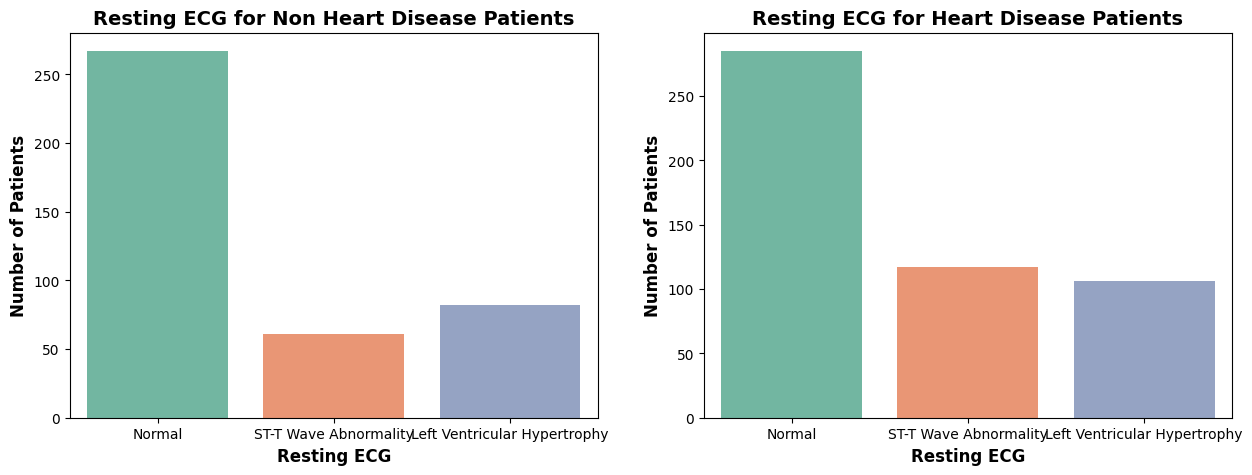

In [23]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x='resting_ecg', data=attr_0, palette='Set2', ax=ax1)
plt.xlabel('Resting ECG', fontsize=12, weight='bold')
plt.ylabel('Number of Patients', fontsize=12, weight='bold')
plt.title('Resting ECG for Non Heart Disease Patients', fontsize=14, weight='bold')


ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x='resting_ecg', data=attr_1, palette='Set2', ax=ax1)
plt.xlabel('Resting ECG', fontsize=12, weight='bold')
plt.ylabel('Number of Patients', fontsize=12, weight='bold')
plt.title('Resting ECG for Heart Disease Patients', fontsize=14, weight='bold')
plt.show()

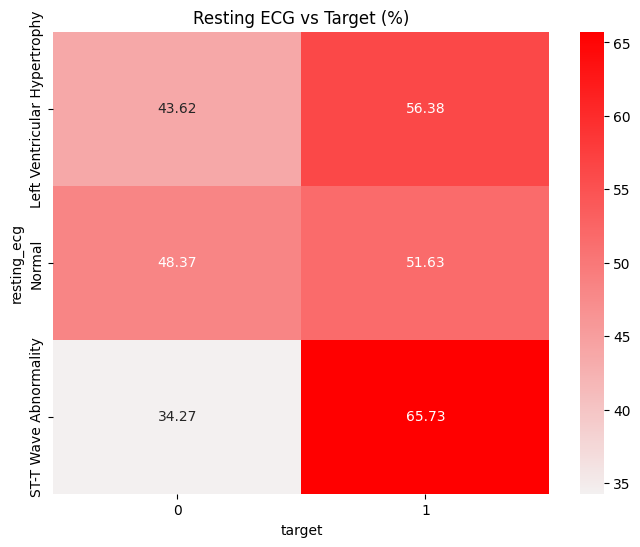

In [24]:
plot_criteria = ['resting_ecg', 'target']


ct = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='index') * 100


plt.figure(figsize=(8,6))
sns.heatmap(ct, annot=True, fmt=".2f", cmap=sns.light_palette("red", as_cmap=True))
plt.title('Resting ECG vs Target (%)')
plt.ylabel(plot_criteria[0])
plt.xlabel(plot_criteria[1])
plt.show()

#### ST Slope Distribution 

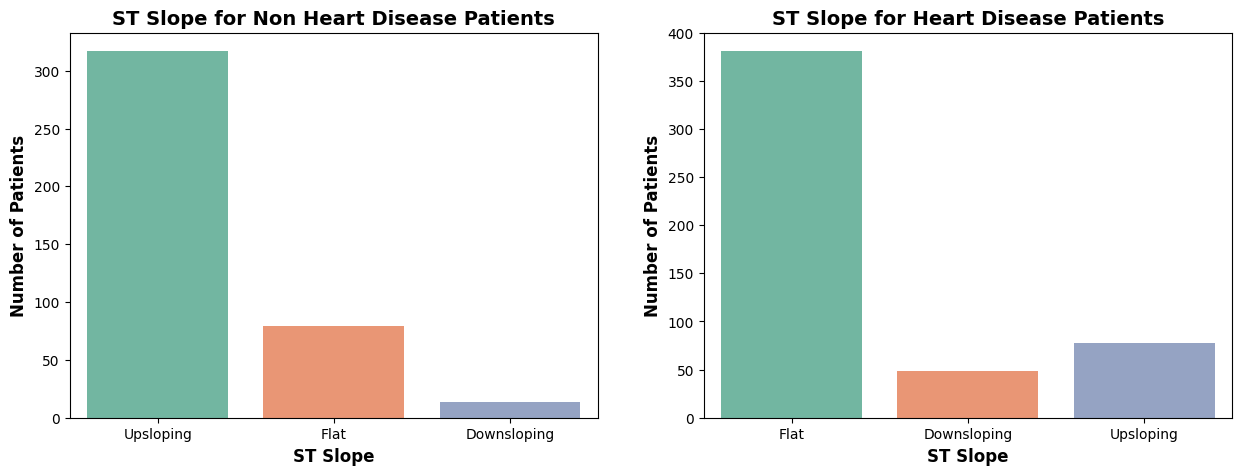

In [25]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x='st_slope', data=attr_0, palette='Set2', ax=ax1)
plt.xlabel('ST Slope', fontsize=12, weight='bold')
plt.ylabel('Number of Patients', fontsize=12, weight='bold')
plt.title('ST Slope for Non Heart Disease Patients', fontsize=14, weight='bold')


ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x='st_slope', data=attr_1, palette='Set2', ax=ax1)
plt.xlabel('ST Slope', fontsize=12, weight='bold')
plt.ylabel('Number of Patients', fontsize=12, weight='bold')
plt.title('ST Slope for Heart Disease Patients', fontsize=14, weight='bold')
plt.show()

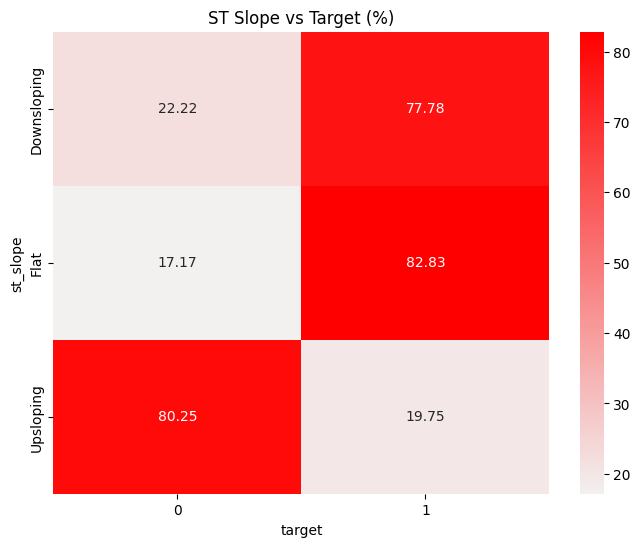

In [26]:
plot_criteria = ['st_slope', 'target']


ct = pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='index') * 100


plt.figure(figsize=(8,6))
sns.heatmap(ct, annot=True, fmt=".2f", cmap=sns.light_palette("red", as_cmap=True))
plt.title('ST Slope vs Target (%)')
plt.ylabel(plot_criteria[0])
plt.xlabel(plot_criteria[1])
plt.show()

#### Distribution of Numerical Features 

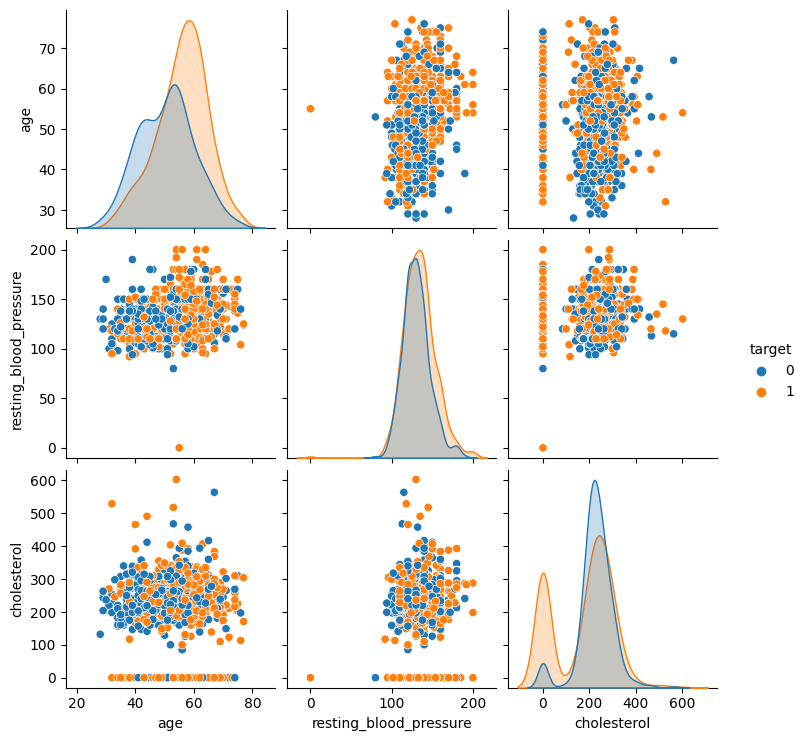

In [27]:
sns.pairplot(df, hue='target', vars = ['age', 'resting_blood_pressure', 'cholesterol'])
plt.show()

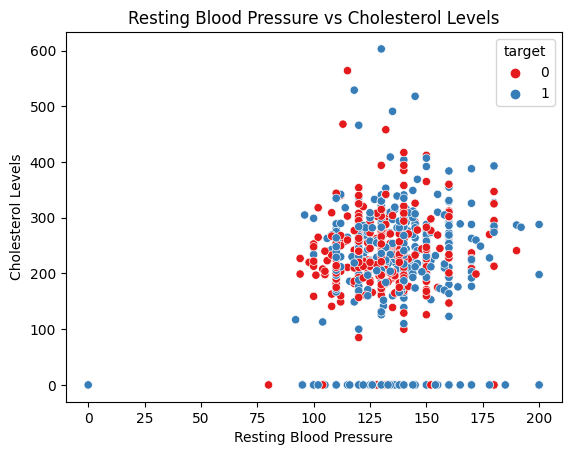

In [28]:
sns.scatterplot(x='resting_blood_pressure', y='cholesterol', hue='target', data=df, palette='Set1')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol Levels')
plt.title('Resting Blood Pressure vs Cholesterol Levels')
plt.show()

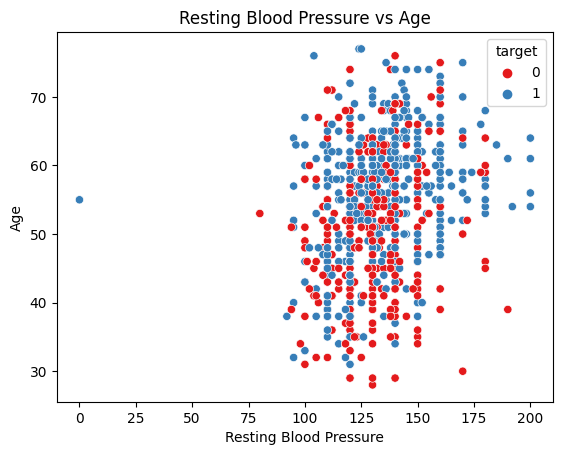

In [29]:
sns.scatterplot(x='resting_blood_pressure', y='age', hue='target', data=df, palette='Set1')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Age')
plt.title('Resting Blood Pressure vs Age')
plt.show()

### Outlier Detection & Removal 

In [30]:
df_numeric = df.select_dtypes(include=['int64', 'float64']).drop(columns=['target'], errors='ignore')


In [31]:
df_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,old_peak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [32]:
z = np.abs(stats.zscore(df_numeric))


In [33]:
threshold = 3
outliers = np.where(z > threshold)
print("Number of outliers detected:", len(outliers[0]))

Number of outliers detected: 19


In [34]:
df = df[(z < threshold).all(axis=1)]

In [35]:
df.shape

(899, 12)

In [36]:
corr_df = df.copy()

In [37]:
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
categorical_cols

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'resting_ecg',
 'exercise_angina',
 'st_slope']

### One -Hot Encoding 

In [38]:
# df = df.drop(categorical_cols, axis=1).join(
#     pd.get_dummies(df[categorical_cols], drop_first=True, dtype=int)
# )

df = pd.get_dummies(df, drop_first=True, dtype=int)

In [39]:
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,old_peak,target,sex_Male,chest_pain_type_Atypical Angina,chest_pain_type_Non-anginal Pain,chest_pain_type_Typical Angina,fasting_blood_sugar_True,resting_ecg_Normal,resting_ecg_ST-T Wave Abnormality,exercise_angina_Yes,st_slope_Flat,st_slope_Upsloping
0,40,140,289,172,0.0,0,1,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,1,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,1,0,0,0,0,0,1,0,1,1,0
4,54,150,195,122,0.0,0,1,0,1,0,0,1,0,0,0,1


In [40]:
df.shape

(899, 16)

In [41]:
X = df.drop('target', axis=1)
y = df['target']

### Correlation 

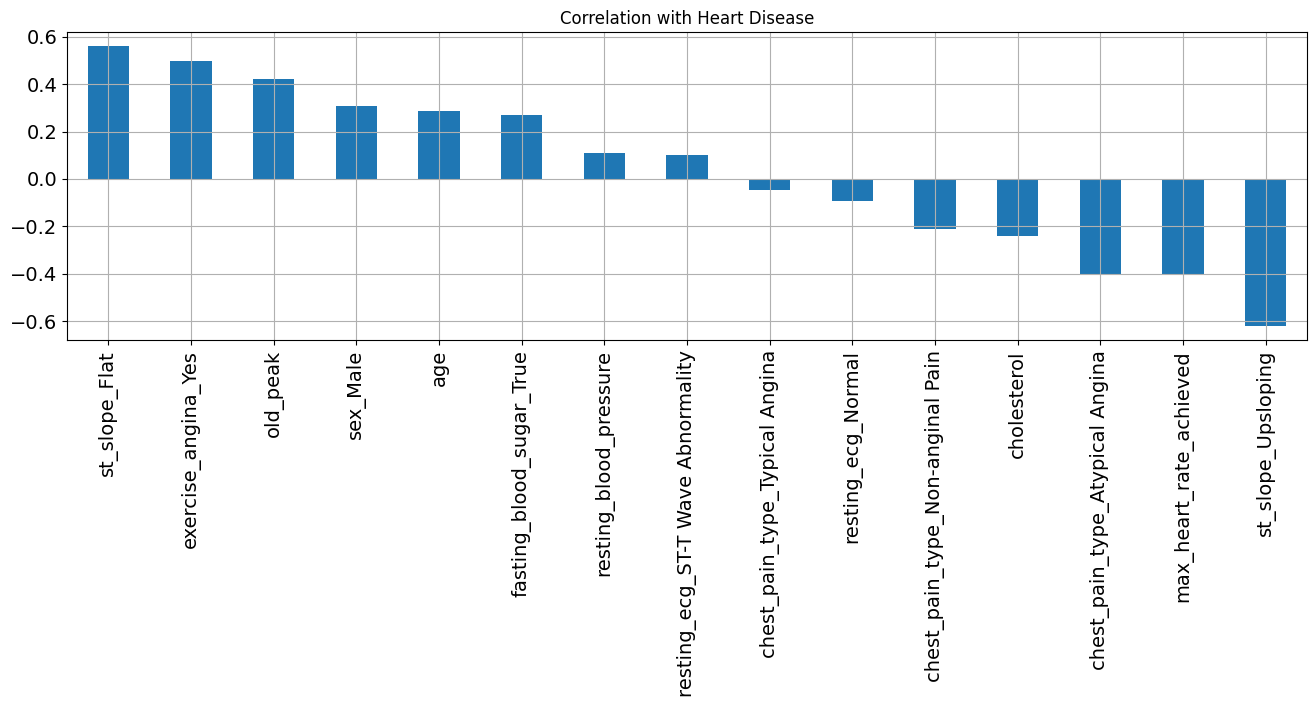

In [42]:
X.corrwith(y).sort_values(ascending=False).plot.bar(figsize=(16,4), title = 'Correlation with Heart Disease', fontsize=14, rot= 90, grid =True)
plt.show()

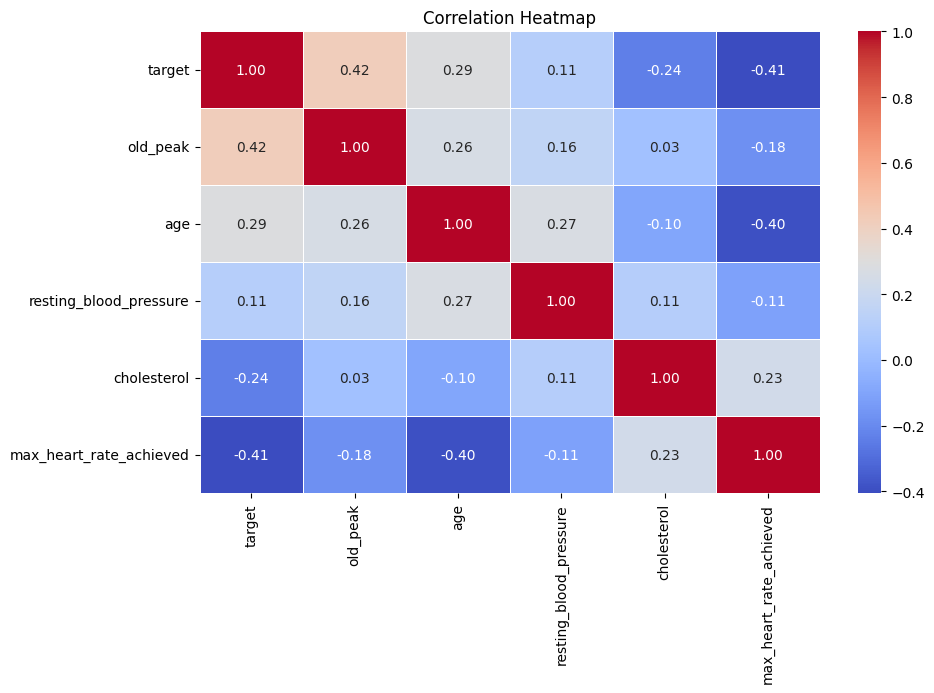

In [43]:

corr_matrix = corr_df.corr(numeric_only=True)


sorted_cols = corr_matrix['target'].sort_values(ascending=False).index
corr_matrix = corr_matrix.loc[sorted_cols, sorted_cols]


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Train Test Split 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

In [45]:
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape)

(719, 15)
(180, 15)
(719,)
(180,)


### Feature Normalization 

In [46]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [47]:
X_train.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,old_peak,sex_Male,chest_pain_type_Atypical Angina,chest_pain_type_Non-anginal Pain,chest_pain_type_Typical Angina,fasting_blood_sugar_True,resting_ecg_Normal,resting_ecg_ST-T Wave Abnormality,exercise_angina_Yes,st_slope_Flat,st_slope_Upsloping
0,0.408163,0.408602,0.498982,0.697842,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.306122,0.623656,0.503055,0.482014,0.666667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.693878,0.731183,0.393075,0.381295,0.333333,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.428571,0.247312,0.539715,0.805755,0.333333,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.448980,0.516129,0.586558,0.553957,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [48]:
X_test.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,old_peak,sex_Male,chest_pain_type_Atypical Angina,chest_pain_type_Non-anginal Pain,chest_pain_type_Typical Angina,fasting_blood_sugar_True,resting_ecg_Normal,resting_ecg_ST-T Wave Abnormality,exercise_angina_Yes,st_slope_Flat,st_slope_Upsloping
0,0.530612,0.623656,0.472505,0.733813,0.600000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.877551,0.215054,0.303462,0.446043,0.600000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.224490,0.494624,0.448065,0.640288,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.836735,0.462366,0.000000,0.482014,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.510204,0.516129,0.494908,0.661871,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [49]:
def GetBaseModels():
    baseModels = []
    

    baseModels.append(('LR_L2', LogisticRegression(penalty='l2', class_weight='balanced', max_iter=1000, random_state=7)))
    baseModels.append(('LDA', LinearDiscriminantAnalysis()))  
    baseModels.append(('KNN5', KNeighborsClassifier(n_neighbors=5, weights='distance')))
    baseModels.append(('KNN7', KNeighborsClassifier(n_neighbors=7, weights='distance')))
    baseModels.append(('KNN9', KNeighborsClassifier(n_neighbors=9, weights='distance')))
    baseModels.append(('KNN11', KNeighborsClassifier(n_neighbors=11, weights='distance'))) 
    baseModels.append(('CART', DecisionTreeClassifier(max_depth=None, min_samples_split=4, random_state=7)))
    baseModels.append(('NB', GaussianNB()))
    baseModels.append(('SVM Linear', SVC(kernel='linear', gamma='auto', probability=True, class_weight='balanced')))
    baseModels.append(('SVM RBF', SVC(kernel='rbf', gamma='scale', C=2.0, probability=True, random_state=7)))
    baseModels.append(('AB', AdaBoostClassifier(n_estimators=300, learning_rate=0.8, random_state=7)))
    baseModels.append(('GBM', GradientBoostingClassifier(n_estimators=200, max_depth=3, random_state=7)))
    baseModels.append(('GBM_200', GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=7)))
    baseModels.append(('RF_Ent500', RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=7)))
    baseModels.append(('RF_Ent100', RandomForestClassifier(criterion='entropy', n_estimators=200, max_depth=None, random_state=7)))
    baseModels.append(('RF_Gini100', RandomForestClassifier(criterion='gini', n_estimators=200, max_depth=None, random_state=7)))
    baseModels.append(('ET100', ExtraTreesClassifier(n_estimators=100, random_state=7)))
    baseModels.append(('ET500', ExtraTreesClassifier(n_estimators=500, random_state=7)))
    baseModels.append(('ET1000', ExtraTreesClassifier(n_estimators=1000, random_state=7)))
    baseModels.append(('MLP', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=7)))
    baseModels.append(('SGD3000', SGDClassifier(max_iter=3000, tol=1e-4, learning_rate='optimal', eta0=0.01, random_state=7)))
    baseModels.append(('XGB_100', xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=7)))
    baseModels.append(('XGB_500', xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss', random_state=7)))
    baseModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators=1000, learning_rate=0.03, use_label_encoder=False, eval_metric='logloss', random_state=7)))
    baseModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators=2000, learning_rate=0.03, max_depth=6, random_state=7)))

    return baseModels


def BaseModelPerformance(X_train, y_train, models):
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=num_folds, shuffle=True, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    
    return names, results
    
    

In [50]:
models = GetBaseModels()
names, results = BaseModelPerformance(X_train, y_train, models)

LR_L2: 0.860974 (0.028940)
LDA: 0.865160 (0.027597)
KNN5: 0.830360 (0.023651)
KNN7: 0.842899 (0.026848)
KNN9: 0.852602 (0.024060)
KNN11: 0.852621 (0.025544)
CART: 0.762148 (0.045094)
NB: 0.852660 (0.033915)
SVM Linear: 0.860955 (0.027625)
SVM RBF: 0.865121 (0.026253)
AB: 0.830340 (0.024552)
GBM: 0.869308 (0.036201)
GBM_200: 0.873513 (0.034674)
RF_Ent500: 0.865141 (0.022212)
RF_Ent100: 0.869327 (0.027014)
RF_Gini100: 0.863752 (0.019173)
ET100: 0.847027 (0.032196)
ET500: 0.863732 (0.032037)
ET1000: 0.863713 (0.028938)
MLP: 0.812265 (0.036223)
SGD3000: 0.820657 (0.095816)
XGB_100: 0.872105 (0.033178)
XGB_500: 0.856847 (0.034960)
XGB_1000: 0.858216 (0.033129)
XGB_2000: 0.856847 (0.043336)


In [51]:

summary = pd.DataFrame({
    'Model': names,
    'Mean Accuracy': [np.mean(r) for r in results],
    'Std Dev': [np.std(r) for r in results]
})


summary_sorted = summary.sort_values(by='Mean Accuracy', ascending=False).reset_index(drop=True)

print("\n Sorted Performance:")
print(summary_sorted.to_string(index=False))


 Sorted Performance:
     Model  Mean Accuracy  Std Dev
   GBM_200       0.873513 0.034674
   XGB_100       0.872105 0.033178
 RF_Ent100       0.869327 0.027014
       GBM       0.869308 0.036201
       LDA       0.865160 0.027597
 RF_Ent500       0.865141 0.022212
   SVM RBF       0.865121 0.026253
RF_Gini100       0.863752 0.019173
     ET500       0.863732 0.032037
    ET1000       0.863713 0.028938
     LR_L2       0.860974 0.028940
SVM Linear       0.860955 0.027625
  XGB_1000       0.858216 0.033129
   XGB_500       0.856847 0.034960
  XGB_2000       0.856847 0.043336
        NB       0.852660 0.033915
     KNN11       0.852621 0.025544
      KNN9       0.852602 0.024060
     ET100       0.847027 0.032196
      KNN7       0.842899 0.026848
      KNN5       0.830360 0.023651
        AB       0.830340 0.024552
   SGD3000       0.820657 0.095816
       MLP       0.812265 0.036223
      CART       0.762148 0.045094


### Model Building 

In [52]:
xgb_100 = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=7)
xgb_100.fit(X_train, y_train)
y_pred_xgb_100 = xgb_100.predict(X_test)

In [53]:
GBM_200 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=7)
GBM_200.fit(X_train, y_train)
y_pred_GBM_200 = GBM_200.predict(X_test)

In [54]:
RF_Ent100 =  RandomForestClassifier(criterion='entropy', n_estimators=200, max_depth=None, random_state=7)
RF_Ent100.fit(X_train, y_train)
y_pred_RF_Ent100 = RF_Ent100.predict(X_test)

In [55]:
GBM= GradientBoostingClassifier(n_estimators=200, max_depth=3, random_state=7)
GBM.fit(X_train, y_train)
y_pred_GBM = GBM.predict(X_test)

In [56]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
y_pred_LDA = LDA.predict(X_test)

In [57]:
RF_Ent500 = RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=7)
RF_Ent500.fit(X_train, y_train)
y_pred_RF_Ent500 = RF_Ent500.predict(X_test)

In [58]:
SVM_RBF = SVC(kernel='rbf', gamma='scale', C=2.0, probability=True, random_state=7)
SVM_RBF.fit(X_train, y_train)
y_pred_SVM_RBF = SVM_RBF.predict(X_test)

In [59]:
RF_Gini100 =RandomForestClassifier(criterion='gini', n_estimators=200, max_depth=None, random_state=7)  
RF_Gini100.fit(X_train, y_train)
y_pred_RF_Gini100 = RF_Gini100.predict(X_test)

In [60]:
ET500 = ExtraTreesClassifier(n_estimators=500, random_state=7)
ET500.fit(X_train, y_train)
y_pred_ET500 = ET500.predict(X_test)


In [61]:
ET1000 = ExtraTreesClassifier(n_estimators=1000, random_state=7)    
ET1000.fit(X_train, y_train)
y_pred_ET1000 = ET1000.predict(X_test)


### Model Evaluation 

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Log Loss,Specificity,Matthews Corr
0,XGB_100,0.877778,0.905263,0.868687,0.886598,0.878788,4.405335,0.888889,0.754944


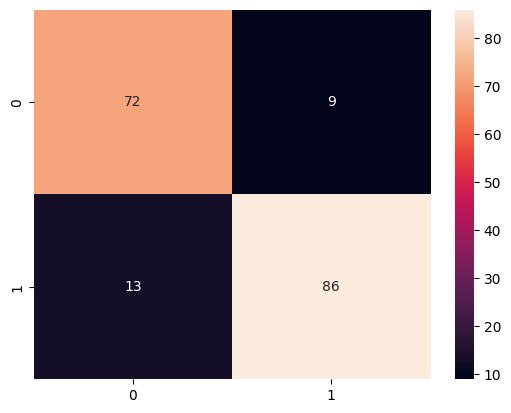

In [62]:
CM = confusion_matrix(y_test, y_pred_xgb_100)
sns.heatmap(CM, annot=True)

TN = CM[0, 0]
FN = CM[1, 0]
TP = CM[1, 1]
FP = CM[0, 1]
specificity = TN / (TN + FP)
loss_log = log_loss(y_test, y_pred_xgb_100)
acc = accuracy_score(y_test, y_pred_xgb_100)
roc = roc_auc_score(y_test, y_pred_xgb_100)
prec = precision_score(y_test, y_pred_xgb_100)
f1 = f1_score(y_test, y_pred_xgb_100)

mathew = matthews_corrcoef(y_test, y_pred_xgb_100)
model_results = pd.DataFrame({
    'Model': ['XGB_100'],
    'Accuracy': [acc],
    'Precision': [prec],
    'Recall': [TP / (TP + FN)],
    'F1 Score': [f1],
    'ROC AUC': [roc],
    'Log Loss': [loss_log],
    'Specificity': [specificity],
    'Matthews Corr': [mathew]
})

model_results

### Comparison with Other Models 

In [63]:
data = {    'GBM_200': y_pred_GBM_200,
            'RF_Ent100': y_pred_RF_Ent100,
            'GBM': y_pred_GBM,
            'LDA': y_pred_LDA,
            'RF_Ent500': y_pred_RF_Ent500,
            'SVM_RBF': y_pred_SVM_RBF,
            'RF_Gini100': y_pred_RF_Gini100,
            'ET500': y_pred_ET500,
            'ET1000': y_pred_ET1000
           }    

models = pd.DataFrame(data)

for column in models:
    CM = confusion_matrix(y_test, models[column])
    

    TN = CM[0, 0]
    FN = CM[1, 0]
    TP = CM[1, 1]
    FP = CM[0, 1]
    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test, models[column])
    acc = accuracy_score(y_test, models[column])
    roc = roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])

    mathew = matthews_corrcoef(y_test, models[column])
    results = pd.DataFrame([[column, acc, prec, TP / (TP + FN), f1, roc, loss_log, specificity, mathew]],
                           columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Log Loss', 'Specificity', 'Matthews Corr'] )
    model_results = pd.concat([model_results, results], ignore_index=True)  
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Log Loss,Specificity,Matthews Corr
0,XGB_100,0.877778,0.905263,0.868687,0.886598,0.878788,4.405335,0.888889,0.754944
1,GBM_200,0.883333,0.882353,0.909091,0.895522,0.880471,4.205093,0.851852,0.763950
2,RF_Ent100,0.861111,0.855769,0.898990,0.876847,0.856902,5.006063,0.814815,0.718979
3,GBM,0.855556,0.854369,0.888889,0.871287,0.851852,5.206305,0.814815,0.707597
4,LDA,0.883333,0.882353,0.909091,0.895522,0.880471,4.205093,0.851852,0.763950
5,RF_Ent500,0.861111,0.849057,0.909091,0.878049,0.855780,5.006063,0.802469,0.719454
6,SVM_RBF,0.894444,0.892157,0.919192,0.905473,0.891695,3.804608,0.864198,0.786485
7,RF_Gini100,0.866667,0.850467,0.919192,0.883495,0.860831,4.805820,0.802469,0.731207
8,ET500,0.877778,0.881188,0.898990,0.890000,0.875421,4.405335,0.851852,0.752721
9,ET1000,0.866667,0.864078,0.898990,0.881188,0.863075,4.805820,0.827160,0.730168


### ROC AUC Curve 

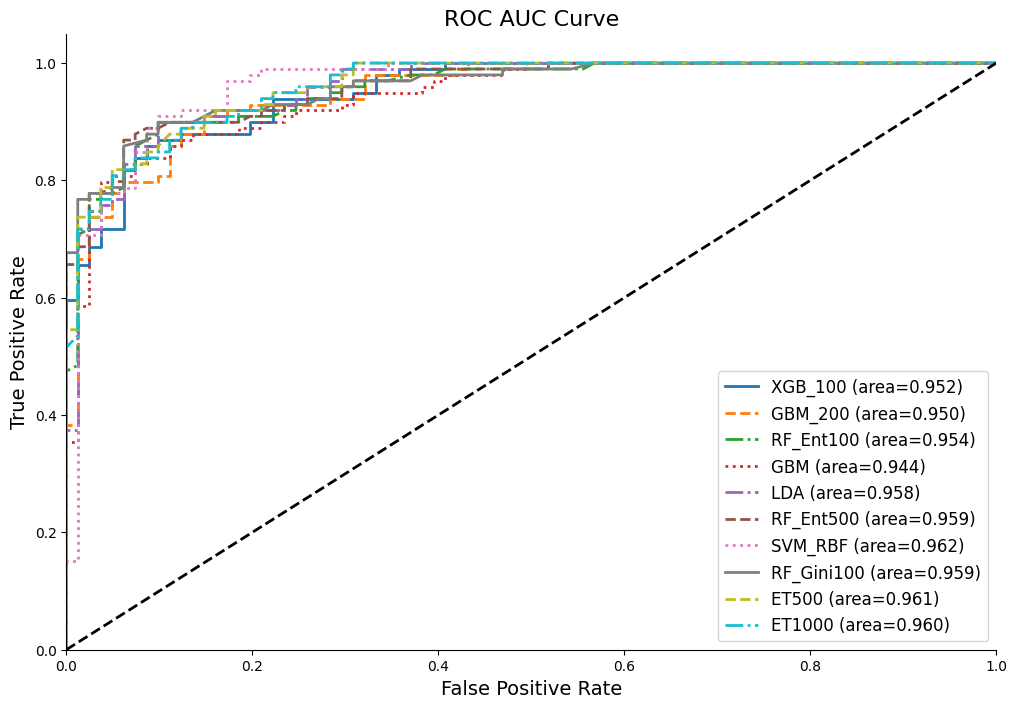

In [64]:
def roc_auc_curve_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
 
    fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])
    auc = roc_auc_score(y_true, y_proba[:, 1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw, label= "%s (area=%.3f)" % (label, roc_auc_score(y_true, y_proba[:, 1])))
    


f, ax = plt.subplots(figsize=(12, 8))

roc_auc_curve_plot(y_test, xgb_100.predict_proba(X_test), label='XGB_100', l='-', lw=2.0)
roc_auc_curve_plot(y_test, GBM_200.predict_proba(X_test), label='GBM_200', l='--', lw=2.0)
roc_auc_curve_plot(y_test, RF_Ent100.predict_proba(X_test), label='RF_Ent100', l='-.', lw=2.0)
roc_auc_curve_plot(y_test, GBM.predict_proba(X_test), label='GBM', l=':', lw=2.0)
roc_auc_curve_plot(y_test, LDA.predict_proba(X_test), label='LDA', l='-.', lw=2.0)
roc_auc_curve_plot(y_test, RF_Ent500.predict_proba(X_test), label='RF_Ent500', l='--', lw=2.0)
roc_auc_curve_plot(y_test, SVM_RBF.predict_proba(X_test), label='SVM_RBF', l=':', lw=2.0)
roc_auc_curve_plot(y_test, RF_Gini100.predict_proba(X_test), label='RF_Gini100', l='-', lw=2.0)
roc_auc_curve_plot(y_test, ET500.predict_proba(X_test), label='ET500', l='--', lw=2.0)
roc_auc_curve_plot(y_test, ET1000.predict_proba(X_test), label='ET1000', l='-.', lw=2.0)            

ax.plot([0, 1], [0, 1], 'k--', lw=2.0)
ax.legend(loc='lower right', fontsize=12)
ax.set_xlabel('False Positive Rate', fontsize=14)
ax.set_ylabel('True Positive Rate', fontsize=14)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_title('ROC AUC Curve', fontsize=16)
sns.despine()
plt.show()

### Precision Recall Curve 

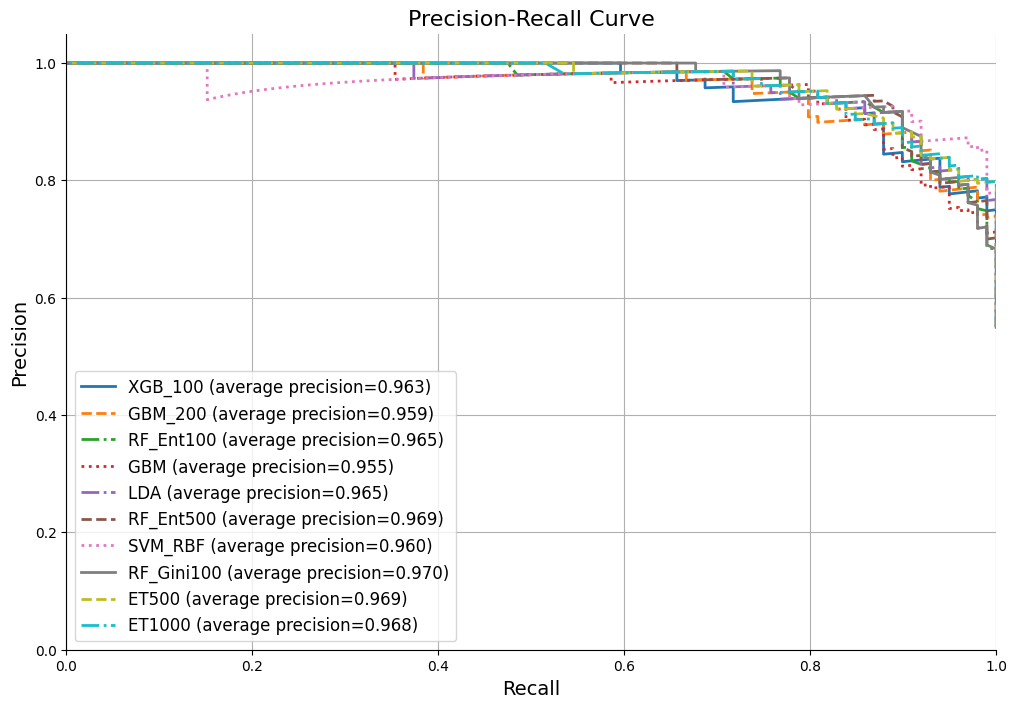

In [65]:
def precision_recall_curve_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
 
    precision, recall, _ = precision_recall_curve(y_true, y_proba[:, 1])
    average_precision = average_precision_score(y_true, y_proba[:, 1], average='micro')

    ax.plot(recall, precision, label='%s (average precision=%.3f)' % (label, average_precision), linestyle=l, linewidth=lw)
f, ax = plt.subplots(figsize=(12, 8))

precision_recall_curve_plot(y_test, xgb_100.predict_proba(X_test), label='XGB_100', l='-', lw=2.0)
precision_recall_curve_plot(y_test, GBM_200.predict_proba(X_test), label='GBM_200', l='--', lw=2.0)
precision_recall_curve_plot(y_test, RF_Ent100.predict_proba(X_test), label='RF_Ent100', l='-.', lw=2.0)
precision_recall_curve_plot(y_test, GBM.predict_proba(X_test), label='GBM', l=':', lw=2.0)
precision_recall_curve_plot(y_test, LDA.predict_proba(X_test), label='LDA', l='-.', lw=2.0)
precision_recall_curve_plot(y_test, RF_Ent500.predict_proba(X_test), label='RF_Ent500', l='--', lw=2.0)
precision_recall_curve_plot(y_test, SVM_RBF.predict_proba(X_test), label='SVM_RBF', l=':', lw=2.0)
precision_recall_curve_plot(y_test, RF_Gini100.predict_proba(X_test), label='RF_Gini100', l='-', lw=2.0)
precision_recall_curve_plot(y_test, ET500.predict_proba(X_test), label='ET500', l='--', lw=2.0)
precision_recall_curve_plot(y_test, ET1000.predict_proba(X_test), label='ET1000', l='-.', lw=2.0)

ax.set_xlabel('Recall', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.legend(loc='lower left', fontsize=12)
ax.grid(True)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_title('Precision-Recall Curve', fontsize=16)
sns.despine()   
plt.show()


In [66]:
num_feats = 11

def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    for i in X.columns:
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    cor_feature = X.iloc[:, np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X_train, y_train, num_feats)
print(str(len(cor_feature)), "Selected Features")


11 Selected Features


In [67]:
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:, chi_support].columns.tolist()
print(str(len(chi_feature)), "Selected Features")

11 Selected Features


In [68]:
rfe_selector = RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
refe_support = rfe_selector.get_support()
rfe_feature = X.loc[:, refe_support].columns.tolist()
print(str(len(rfe_feature)), "Selected Features")

Fitting estimator with 15 features.
11 Selected Features


In [69]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty='l2', solver='lbfgs'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:, embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), "Selected Features")

9 Selected Features


In [70]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100,criterion='gini'), max_features=num_feats)
embeded_rf_selector.fit(X_norm, y)  
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:, embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), "Selected Features")

8 Selected Features


In [71]:
lgbc = LGBMClassifier(
    n_estimators=100, 
    learning_rate=0.05, 
    num_leaves=32, 
    colsample_bytree=0.2, 
    reg_alpha=3, 
    reg_lambda=1, 
    min_split_gain=0.01, 
    min_child_weight=40
)

embeded_lr_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lgbm_support = embeded_lr_selector.get_support()
embeded_lgbm_feature = X.loc[:, embeded_lgbm_support].columns.tolist()  

print(str(len(embeded_lgbm_feature)), "Selected Features")

[LightGBM] [Info] Number of positive: 492, number of negative: 407
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 393
[LightGBM] [Info] Number of data points in the train set: 899, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547275 -> initscore=0.189666
[LightGBM] [Info] Start training from score 0.189666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [72]:
feature_name = X.columns

feature_selection_df = pd.DataFrame({'Feature': feature_name,
                                     'Pearson' : cor_support,
                                        'Chi2': chi_support,
                                        'RFE': refe_support,
                                        'LogisticRegression': embeded_lr_support,
                                        'RandomForest': embeded_rf_support,
                                        'LGBM': embeded_lgbm_support
                                    })

feature_selection_df['Total'] = np.sum(feature_selection_df.iloc[:, 1:], axis=1)

feature_selection_df = feature_selection_df.sort_values(by=['Total','Feature'], ascending=False)
feature_selection_df.index= range(1, len(feature_selection_df) + 1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi2,RFE,LogisticRegression,RandomForest,LGBM,Total
1,st_slope_Upsloping,True,True,True,True,True,True,6
2,st_slope_Flat,True,True,True,True,True,True,6
3,old_peak,True,True,True,True,True,True,6
4,cholesterol,True,True,True,True,True,True,6
5,max_heart_rate_achieved,True,True,True,False,True,True,5
6,exercise_angina_Yes,True,True,True,False,True,True,5
7,sex_Male,True,True,True,True,False,False,4
8,fasting_blood_sugar_True,True,True,True,True,False,False,4
9,chest_pain_type_Atypical Angina,True,True,True,True,False,False,4
10,age,True,False,True,False,True,True,4


In [73]:
feature_name

Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'old_peak', 'sex_Male',
       'chest_pain_type_Atypical Angina', 'chest_pain_type_Non-anginal Pain',
       'chest_pain_type_Typical Angina', 'fasting_blood_sugar_True',
       'resting_ecg_Normal', 'resting_ecg_ST-T Wave Abnormality',
       'exercise_angina_Yes', 'st_slope_Flat', 'st_slope_Upsloping'],
      dtype='object')

In [74]:
X = df.drop(['target','age', 'resting_blood_pressure', 'sex_Male',
       'chest_pain_type_Atypical Angina', 'chest_pain_type_Non-anginal Pain',
       'chest_pain_type_Typical Angina', 'fasting_blood_sugar_True',
       'resting_ecg_Normal', 'resting_ecg_ST-T Wave Abnormality'], axis=1)
y = df['target']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=5, stratify=y)

In [76]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)  
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns) 


In [77]:
models = GetBaseModels()
names, results = BaseModelPerformance(X_train, y_train, models)

LR_L2: 0.823455 (0.037022)
LDA: 0.824844 (0.037106)
KNN5: 0.812246 (0.037358)
KNN7: 0.819210 (0.033932)
KNN9: 0.831710 (0.026677)
KNN11: 0.833099 (0.024855)
CART: 0.796968 (0.052309)
NB: 0.841491 (0.026281)
SVM Linear: 0.819268 (0.042356)
SVM RBF: 0.855360 (0.016612)
AB: 0.821987 (0.032677)
GBM: 0.844249 (0.028219)
GBM_200: 0.847046 (0.023858)
RF_Ent500: 0.834527 (0.029260)
RF_Ent100: 0.828951 (0.025504)
RF_Gini100: 0.831749 (0.027891)
ET100: 0.813674 (0.023107)
ET500: 0.817879 (0.031018)
ET1000: 0.819268 (0.032572)
MLP: 0.840043 (0.030648)
SGD3000: 0.830360 (0.033159)
XGB_100: 0.847027 (0.024743)
XGB_500: 0.831768 (0.023294)
XGB_1000: 0.833118 (0.013687)
XGB_2000: 0.828932 (0.013906)


In [78]:
summary = pd.DataFrame({
    'Model': names,
    'Mean Accuracy': [np.mean(r) for r in results],
    'Std Dev': [np.std(r) for r in results]
})


summary_sorted = summary.sort_values(by='Mean Accuracy', ascending=False).reset_index(drop=True)

print("\n Sorted Performance:")
print(summary_sorted.to_string(index=False))


 Sorted Performance:
     Model  Mean Accuracy  Std Dev
   SVM RBF       0.855360 0.016612
   GBM_200       0.847046 0.023858
   XGB_100       0.847027 0.024743
       GBM       0.844249 0.028219
        NB       0.841491 0.026281
       MLP       0.840043 0.030648
 RF_Ent500       0.834527 0.029260
  XGB_1000       0.833118 0.013687
     KNN11       0.833099 0.024855
   XGB_500       0.831768 0.023294
RF_Gini100       0.831749 0.027891
      KNN9       0.831710 0.026677
   SGD3000       0.830360 0.033159
 RF_Ent100       0.828951 0.025504
  XGB_2000       0.828932 0.013906
       LDA       0.824844 0.037106
     LR_L2       0.823455 0.037022
        AB       0.821987 0.032677
    ET1000       0.819268 0.032572
SVM Linear       0.819268 0.042356
      KNN7       0.819210 0.033932
     ET500       0.817879 0.031018
     ET100       0.813674 0.023107
      KNN5       0.812246 0.037358
      CART       0.796968 0.052309


### Soft Voting 

In [79]:
clf1 = SVC(kernel='rbf', gamma='scale', C=2.0, probability=True, random_state=7)

clf2 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=7)
clf3 = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=7)
 
clf4 = GradientBoostingClassifier(n_estimators=200, max_depth=3, random_state=7)
clf5 = GaussianNB()

eclf1 = VotingClassifier(estimators=[('SVM RBF', clf1),
                                    ('GBM_200', clf2),
                                    ('XGB_100', clf3),
                                    ('GBM', clf4),
                                    ('NB', clf5)],
                         voting='soft', weights=[2, 2, 1, 1, 1]) 
eclf1.fit(X_train, y_train)
y_pred_eclf1 = eclf1.predict(X_test)


### Model Evaluation 

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Log Loss,Specificity,Matthews Corr
0,Soft Voting,0.811111,0.798165,0.878788,0.836538,0.803591,6.808246,0.728395,0.618069


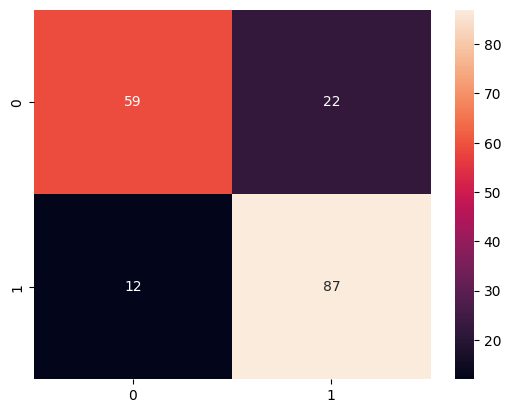

In [80]:
CM = confusion_matrix(y_test, y_pred_eclf1)
sns.heatmap(CM, annot=True)

TN = CM[0, 0]
FN = CM[1, 0]
TP = CM[1, 1]
FP = CM[0, 1]
specificity = TN / (TN + FP)
loss_log = log_loss(y_test, y_pred_eclf1)
acc = accuracy_score(y_test, y_pred_eclf1)
roc = roc_auc_score(y_test, y_pred_eclf1)
prec = precision_score(y_test, y_pred_eclf1)
f1 = f1_score(y_test, y_pred_eclf1)

mathew = matthews_corrcoef(y_test, y_pred_eclf1)
model_results = pd.DataFrame({
    'Model': ['Soft Voting'],
    'Accuracy': [acc],
    'Precision': [prec],
    'Recall': [TP / (TP + FN)],
    'F1 Score': [f1],
    'ROC AUC': [roc],
    'Log Loss': [loss_log],
    'Specificity': [specificity],
    'Matthews Corr': [mathew]
})

model_results

In [81]:
SVM_RBF =  SVC(kernel='rbf', gamma='scale', C=2.0, probability=True, random_state=7)
SVM_RBF.fit(X_train, y_train)
y_pred_SVM_RBF = SVM_RBF.predict(X_test)

In [82]:
GBM_200 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=7)
GBM_200.fit(X_train, y_train)
y_pred_GBM_200 = GBM_200.predict(X_test)

In [83]:
xgb_100 = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=7)
xgb_100.fit(X_train, y_train)
y_pred_xgb_100 = xgb_100.predict(X_test)

In [84]:
GBM= GradientBoostingClassifier(n_estimators=200, max_depth=3, random_state=7)
GBM.fit(X_train, y_train)
y_pred_GBM = GBM.predict(X_test)

In [85]:
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred_NB = NB.predict(X_test)

In [86]:
MLP = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=7)
MLP.fit(X_train, y_train)
y_pred_MLP = MLP.predict(X_test)

In [87]:
RF_Ent500 = RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=7)
RF_Ent500.fit(X_train, y_train)
y_pred_RF_Ent500 = RF_Ent500.predict(X_test)

In [88]:
xgb_1000 = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.03, use_label_encoder=False, eval_metric='logloss', random_state=7)
xgb_1000.fit(X_train, y_train)
y_pred_xgb_1000 = xgb_1000.predict(X_test)

In [89]:
KNN11 = KNeighborsClassifier(n_neighbors=11, weights='distance')
KNN11.fit(X_train, y_train)
y_pred_KNN11 = KNN11.predict(X_test)

In [90]:
xgb_500 = xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss', random_state=7)
xgb_500.fit(X_train, y_train)
y_pred_xgb_500 = xgb_500.predict(X_test)


### Comparison with Other Models 

In [91]:
data = {    'SVM_RBF' : y_pred_SVM_RBF,
            'GBM_200': y_pred_GBM_200,
            'xgb_100': y_pred_xgb_100,
            'GBM': y_pred_GBM,
            'NB': y_pred_NB,
            'MLP': y_pred_MLP,
            'RF_Ent500': y_pred_RF_Ent500,
           'xgb_1000': y_pred_xgb_1000,
            'KNN11': y_pred_KNN11,
            'xgb_500': y_pred_xgb_500,
           }    

models = pd.DataFrame(data)

for column in models:
    CM = confusion_matrix(y_test, models[column])
    

    TN = CM[0, 0]
    FN = CM[1, 0]
    TP = CM[1, 1]
    FP = CM[0, 1]
    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test, models[column])
    acc = accuracy_score(y_test, models[column])
    roc = roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])

    mathew = matthews_corrcoef(y_test, models[column])
    results = pd.DataFrame([[column, acc, prec, TP / (TP + FN), f1, roc, loss_log, specificity, mathew]],
                           columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Log Loss', 'Specificity', 'Matthews Corr'] )
    model_results = pd.concat([model_results, results], ignore_index=True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Log Loss,Specificity,Matthews Corr
0,Soft Voting,0.811111,0.798165,0.878788,0.836538,0.803591,6.808246,0.728395,0.618069
1,SVM_RBF,0.811111,0.777778,0.919192,0.842593,0.799102,6.808246,0.679012,0.623945
2,GBM_200,0.788889,0.790476,0.838384,0.813725,0.783389,7.609216,0.728395,0.571937
3,xgb_100,0.816667,0.811321,0.868687,0.839024,0.810887,6.608003,0.753086,0.628671
4,GBM,0.800000,0.800000,0.848485,0.823529,0.794613,7.208731,0.740741,0.594588
5,NB,0.844444,0.831776,0.898990,0.864078,0.838384,5.606791,0.777778,0.685719
6,MLP,0.800000,0.788991,0.868687,0.826923,0.792368,7.208731,0.716049,0.595220
7,RF_Ent500,0.794444,0.787037,0.858586,0.821256,0.787318,7.408973,0.716049,0.583545
8,xgb_1000,0.811111,0.815534,0.848485,0.831683,0.806958,6.808246,0.765432,0.617313
9,KNN11,0.794444,0.787037,0.858586,0.821256,0.787318,7.408973,0.716049,0.583545


### ROC AUC Curve

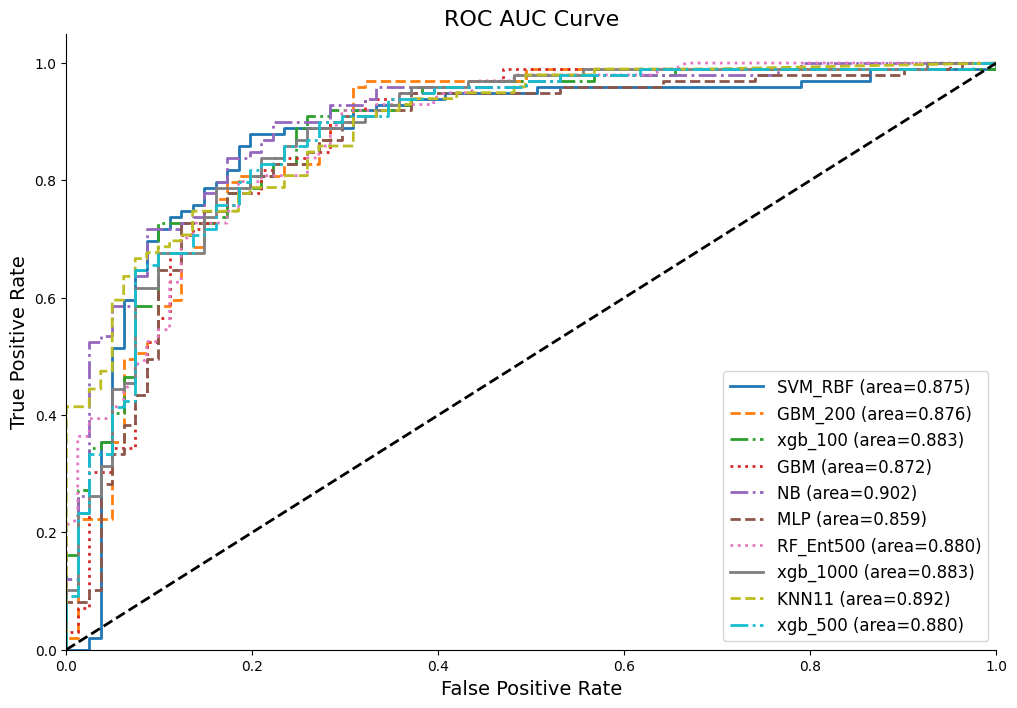

In [92]:
def roc_auc_curve_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
 
    fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])
    auc = roc_auc_score(y_true, y_proba[:, 1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw, label= "%s (area=%.3f)" % (label, roc_auc_score(y_true, y_proba[:, 1])))
    


f, ax = plt.subplots(figsize=(12, 8))

roc_auc_curve_plot(y_test, SVM_RBF.predict_proba(X_test), label='SVM_RBF', l='-', lw=2.0)
roc_auc_curve_plot(y_test, GBM_200.predict_proba(X_test), label='GBM_200', l='--', lw=2.0)
roc_auc_curve_plot(y_test, xgb_100.predict_proba(X_test), label='xgb_100', l='-.', lw=2.0)
roc_auc_curve_plot(y_test, GBM.predict_proba(X_test), label='GBM', l=':', lw=2.0)
roc_auc_curve_plot(y_test, NB.predict_proba(X_test), label='NB', l='-.', lw=2.0)
roc_auc_curve_plot(y_test, MLP.predict_proba(X_test), label='MLP', l='--', lw=2.0)
roc_auc_curve_plot(y_test, RF_Ent500.predict_proba(X_test), label='RF_Ent500', l=':', lw=2.0)
roc_auc_curve_plot(y_test, xgb_1000.predict_proba(X_test), label='xgb_1000', l='-', lw=2.0)
roc_auc_curve_plot(y_test, KNN11.predict_proba(X_test), label='KNN11', l='--', lw=2.0)
roc_auc_curve_plot(y_test, xgb_500.predict_proba(X_test), label='xgb_500', l='-.', lw=2.0)            

ax.plot([0, 1], [0, 1], 'k--', lw=2.0)
ax.legend(loc='lower right', fontsize=12)
ax.set_xlabel('False Positive Rate', fontsize=14)
ax.set_ylabel('True Positive Rate', fontsize=14)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_title('ROC AUC Curve', fontsize=16)
sns.despine()
plt.show()


### Precision Recall Curve

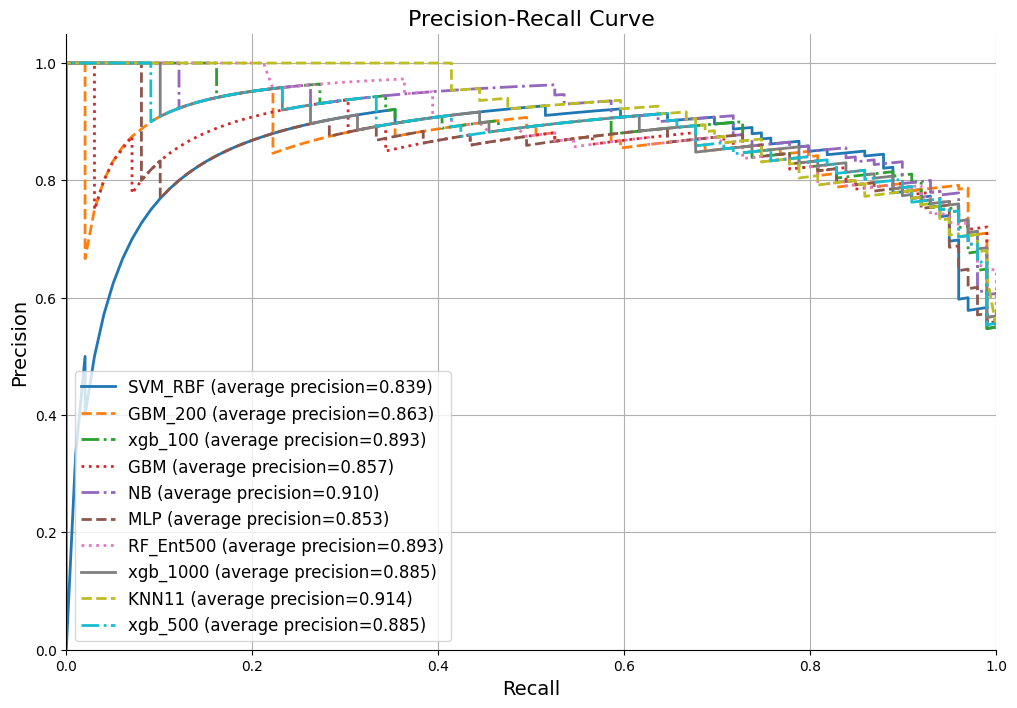

In [93]:
 
def precision_recall_curve_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
 
    precision, recall, _ = precision_recall_curve(y_true, y_proba[:, 1])
    average_precision = average_precision_score(y_true, y_proba[:, 1], average='micro')

    ax.plot(recall, precision, label='%s (average precision=%.3f)' % (label, average_precision), linestyle=l, linewidth=lw)
f, ax = plt.subplots(figsize=(12, 8))

precision_recall_curve_plot(y_test, SVM_RBF.predict_proba(X_test), label='SVM_RBF', l='-', lw=2.0)
precision_recall_curve_plot(y_test, GBM_200.predict_proba(X_test), label='GBM_200', l='--', lw=2.0)
precision_recall_curve_plot(y_test, xgb_100.predict_proba(X_test), label='xgb_100', l='-.', lw=2.0)
precision_recall_curve_plot(y_test, GBM.predict_proba(X_test), label='GBM', l=':', lw=2.0)
precision_recall_curve_plot(y_test, NB.predict_proba(X_test), label='NB', l='-.', lw=2.0)
precision_recall_curve_plot(y_test, MLP.predict_proba(X_test), label='MLP', l='--', lw=2.0)
precision_recall_curve_plot(y_test, RF_Ent500.predict_proba(X_test), label='RF_Ent500', l=':', lw=2.0)
precision_recall_curve_plot(y_test, xgb_1000.predict_proba(X_test), label='xgb_1000', l='-', lw=2.0)
precision_recall_curve_plot(y_test, KNN11.predict_proba(X_test), label='KNN11', l='--', lw=2.0)
precision_recall_curve_plot(y_test, xgb_500.predict_proba(X_test), label='xgb_500', l='-.', lw=2.0)       


ax.set_xlabel('Recall', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.legend(loc='lower left', fontsize=12)
ax.grid(True)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_title('Precision-Recall Curve', fontsize=16)
sns.despine()   
plt.show()

### Feature Importance

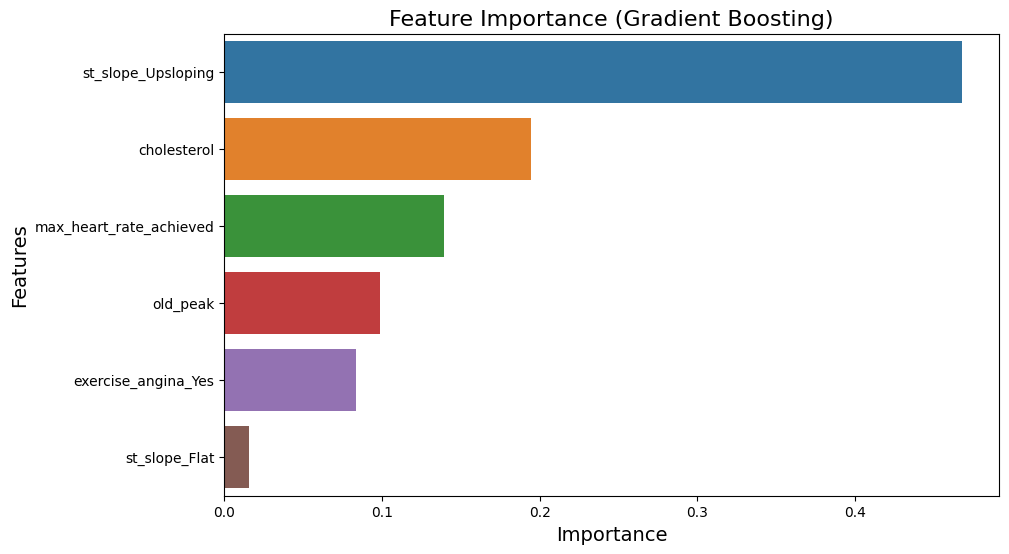

In [94]:
feature_importance = pd.Series(GBM_200.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance (Gradient Boosting)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()